In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.drop(['CustomerID'], axis=1, inplace=True)

In [9]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Visulization

In [10]:
plt.figure(1, figsize = (15, 6))

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

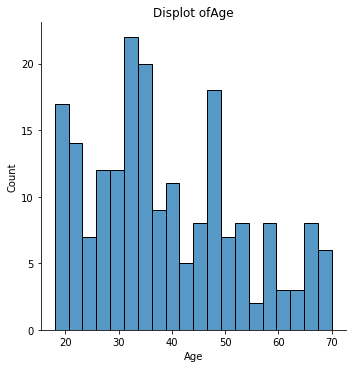

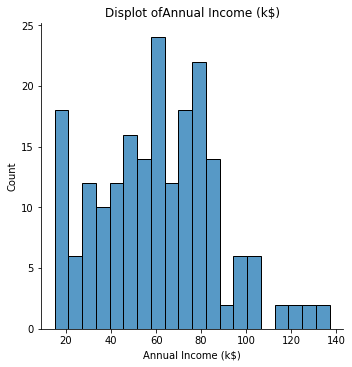

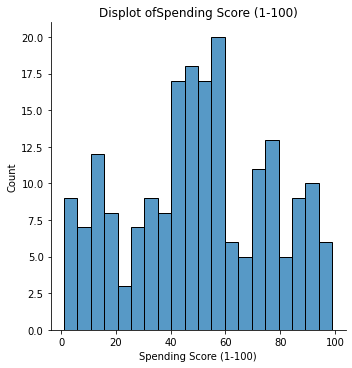

In [11]:
n=0
for x in {'Age', 'Annual Income (k$)', 'Spending Score (1-100)'}:
    n+=1
    plt.subplots_adjust(hspace=0.5, wspace = 0.5)
    sns.displot(data[x], bins=20)
    plt.title('Displot of{}'. format(x))
plt.show()


In [12]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

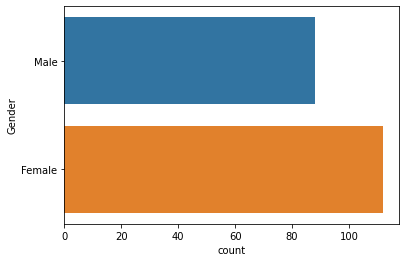

In [13]:
sns.countplot(y= "Gender", data= data)
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans()
x = data.loc[:, ['Age', 'Spending Score (1-100)' ]].values

In [16]:
kmeans.fit(x)

KMeans()

In [17]:
kmeans.inertia_

12997.449288119293

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    

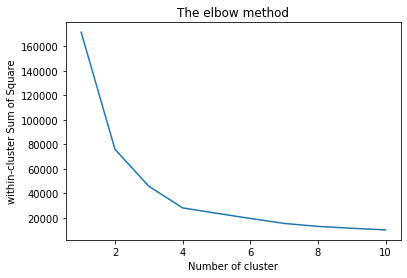

In [19]:
number_cluster = range(1,11)
plt.plot(number_cluster, wcss)
plt.title("The elbow method")
plt.xlabel("Number of cluster")
plt.ylabel('within-cluster Sum of Square')
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 4)
# fit_predict this method will fit and perform predictions over training data thus, is more appropriate when performing operations such as clustering.
label = kmeans.fit_predict(x)
print(label)

[0 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 0 0 1 2 0 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1
 2 1 2 3 2 3 0 1 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 2 0 2 3 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 3 2
 1 2 1 2 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 0
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [21]:
print(kmeans.cluster_centers_)

[[27.61702128 49.14893617]
 [43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]]


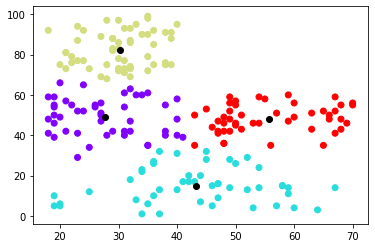

In [22]:
plt.scatter(x[:, 0], x[:, 1], c = kmeans.labels_, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.show()

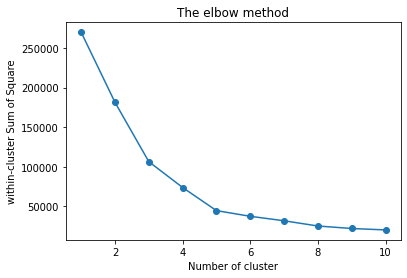

In [23]:
x1 = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)' ]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x1)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
number_cluster = range(1,11)
plt.plot(number_cluster, wcss,marker = 'o')
plt.title("The elbow method")
plt.xlabel("Number of cluster")
plt.ylabel('within-cluster Sum of Square')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 5)
label = kmeans.fit_predict(x1)
print(label)

[4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4
 1 4 1 4 1 4 3 4 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


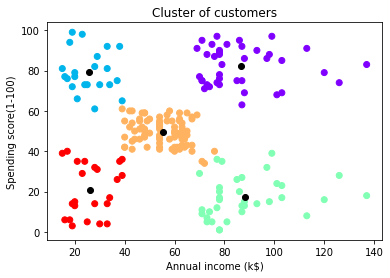

In [25]:
plt.scatter(x1[:, 0], x1[:, 1], c = kmeans.labels_, cmap = "rainbow")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'black')
plt.title('Cluster of customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score(1-100)')
plt.show()

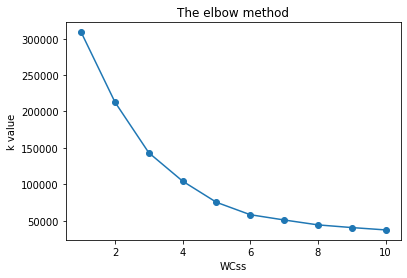

In [26]:
x2 = data.iloc[:, 1:].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(i)
    kmeans.fit(x2)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
number_cluster = range(1,11)
plt.plot(number_cluster, wcss,marker = 'o')
plt.title("The elbow method")
plt.xlabel("WCss")
plt.ylabel('k value')
plt.show()

In [27]:
kmeans = KMeans(5)
label = kmeans.fit_predict(x2)
print(label)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [28]:
print(kmeans.cluster_centers_)

[[43.12658228 54.82278481 49.83544304]
 [32.69230769 86.53846154 82.12820513]
 [25.27272727 25.72727273 79.36363636]
 [40.32432432 87.43243243 18.18918919]
 [45.2173913  26.30434783 20.91304348]]


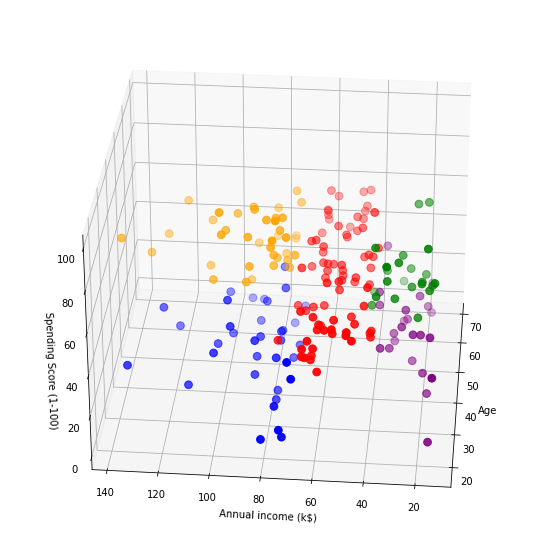

In [29]:
clusters = kmeans.fit_predict(x2)
data['label'] = clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(data.Age[data.label == 0], data['Annual Income (k$)'][data.label == 0], data['Spending Score (1-100)'][data.label == 0], c="blue", s=60)
ax.scatter(data.Age[data.label == 1], data['Annual Income (k$)'][data.label == 1], data['Spending Score (1-100)'][data.label == 1], c="red", s=60)
ax.scatter(data.Age[data.label == 2], data['Annual Income (k$)'][data.label == 2], data['Spending Score (1-100)'][data.label == 2], c="green", s=60)
ax.scatter(data.Age[data.label == 3], data['Annual Income (k$)'][data.label == 3], data['Spending Score (1-100)'][data.label == 3], c="orange", s=60)
ax.scatter(data.Age[data.label == 4], data['Annual Income (k$)'][data.label == 4], data['Spending Score (1-100)'][data.label == 4], c="purple", s=60)
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel('Annual income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()